# big data group project: Functional map of the world

In [1]:
import pandas as pd
import ast
trainval = pd.read_csv("groundtruthdata.csv")
categorical_items = []
for img in trainval[['bounding_boxes']].values:
    correct_list = ast.literal_eval(img[0])
    #print(res[0]['raw_category'])
    categorical_items.append(correct_list[0]['raw_category'])

# Add New Row
trainval['category'] = pd.Series(categorical_items)


In [2]:
country_df = trainval[['country_code', 'category']].copy()

In [3]:
recreational = ["Golf Course", "Basketball Court", "Track and Field", "Soccer", 
                "Tennis Court", "Baseball Field", "American Football", "Swimming Pool"]
food_manufacture = ["Crop Field Rice","Crop Field Corn","Crop_Field_General","Crop Field Barley","Crop Field Wheat","Crop Field Vineyard",
                    "Crop Field Coffee","Crop Field Flowers","Crop Field Tea","Aquaculture"]

rec_df = country_df[country_df['category'].isin(recreational)]
food_df = country_df[country_df['category'].isin(food_manufacture)]

In [9]:
#rec_df.head(30)
rec_count = rec_df['country_code'].value_counts()
rec_count_df = pd.DataFrame(rec_count)
rec_count_df.reset_index(inplace=True)
rec_count_df = rec_count_df.rename(columns={'country_code':'recreational', 'index':'country_code'})
rec_count_df.head()

,country_code,recreational
0,USA,23496
1,BRA,4286
2,FRA,3657
3,JPN,2600
4,AUS,1891


In [5]:
food_count = food_df['country_code'].value_counts()
food_count_df = pd.DataFrame(food_count)
food_count_df.reset_index(inplace=True)
food_count_df = food_count_df.rename(columns={'country_code':'food_production', 'index':'country_code'})

food_count_df.head()

,country_code,food_production
0,ITA,9821
1,FRA,9815
2,PHL,2193
3,USA,1398
4,JPN,733


In [6]:
country_codes = pd.read_csv('country_codes_2020.csv')
# Country population information
country_populations = pd.read_csv('countries_by_population_2019.csv')
# Merging previous two dataframes
country_df = country_codes.merge(country_populations, on='name', how='inner')
country_df = country_df.rename(columns={'cca3':'country_code'})
country_df.head()

,name,cca2,country_code,ccn3,bmi,Rank,pop2019,pop2018,GrowthRate,area,Density
0,Afghanistan,AF,AFG,4,4.5,37,38041.754,NaN,1.0233,652230.0,58.3257
1,Albania,AL,ALB,8,22.3,140,2880.917,NaN,0.9989,28748.0,100.2128
2,Algeria,DZ,DZA,12,26.6,34,43053.054,NaN,1.0185,2381741.0,18.0763
3,American Samoa,AS,ASM,16,NaN,209,55.312,NaN,0.9978,199.0,277.9497
4,Andorra,AD,AND,20,28.0,202,77.142,NaN,1.0016,468.0,164.8333


In [7]:
country_df = country_df.merge(rec_count_df, on='country_code', how='inner')

In [34]:
country_df = country_df.drop(country_df[country_df.bmi < 12].index)
country_df['recreational_per_area'] = country_df.apply(lambda row: (row.recreational/row.area), axis = 1)
#country_df.loc[country_df["country_code"] == "BRA"]
country_df.head()

,name,cca2,country_code,ccn3,bmi,Rank,pop2019,pop2018,GrowthRate,area,Density,recreational,recreational_per_area
1,Algeria,DZ,DZA,12,26.6,34,43053.054,NaN,1.0185,2381741.0,18.0763,87,0.000037
3,Argentina,AR,ARG,32,28.5,31,44780.677,NaN,1.0093,2780400.0,16.1058,897,0.000323
5,Aruba,AW,ABW,533,NaN,196,106.314,NaN,1.0043,180.0,590.6333,13,0.072222
6,Australia,AU,AUS,36,30.4,55,25203.198,NaN,1.0118,7692024.0,3.2765,1891,0.000246
8,Bahamas,BS,BHS,44,32.1,178,389.482,NaN,1.0097,13943.0,27.9339,10,0.000717


<AxesSubplot:xlabel='recreational_per_area'>

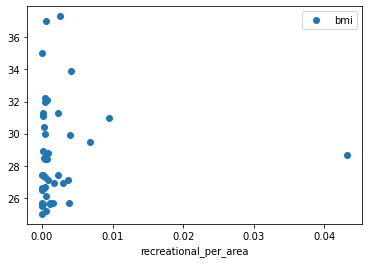

In [32]:
import matplotlib as plt
country_df.plot(x="recreational_per_area", y = "bmi", style = 'o' )

In [33]:
country_df.corr()

,ccn3,bmi,Rank,pop2019,pop2018,GrowthRate,area,Density,recreational,recreational_per_area
ccn3,1.000000,0.147816,-0.173376,0.269468,NaN,-0.003683,0.014512,-0.041197,0.187146,-0.111168
bmi,0.147816,1.000000,0.076441,0.263447,NaN,0.290636,0.141342,0.113376,0.419107,0.046648
Rank,-0.173376,0.076441,1.000000,-0.659626,NaN,-0.193302,-0.422707,0.175455,-0.269858,0.199603
pop2019,0.269468,0.263447,-0.659626,1.000000,NaN,0.126030,0.614281,-0.105058,0.791794,-0.122062
pop2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrowthRate,-0.003683,0.290636,-0.193302,0.126030,NaN,1.000000,0.044179,0.078182,-0.025519,0.013631
area,0.014512,0.141342,-0.422707,0.614281,NaN,0.044179,1.000000,-0.081238,0.443115,-0.100528
Density,-0.041197,0.113376,0.175455,-0.105058,NaN,0.078182,-0.081238,1.000000,-0.040477,0.416921
recreational,0.187146,0.419107,-0.269858,0.791794,NaN,-0.025519,0.443115,-0.040477,1.000000,-0.034390
recreational_per_area,-0.111168,0.046648,0.199603,-0.122062,NaN,0.013631,-0.100528,0.416921,-0.034390,1.000000
